DESCRIPTION:

To give credit where credit is due: This problem was taken from the ACMICPC-Northwest Regional Programming Contest. Thank you problem writers.

You are helping an archaeologist decipher some runes. He knows that this ancient society used a Base 10 system, and that they never start a number with a leading zero. He's figured out most of the digits as well as a few operators, but he needs your help to figure out the rest.

The professor will give you a simple math expression, of the form

[number][op][number]=[number]

He has converted all of the runes he knows into digits. The only operators he knows are addition (+),subtraction(-), and multiplication (*), so those are the only ones that will appear. Each number will be in the range from -1000000 to 1000000, and will consist of only the digits 0-9, possibly a leading -, and maybe a few ?s. If there are ?s in an expression, they represent a digit rune that the professor doesn't know (never an operator, and never a leading -). All of the ?s in an expression will represent the same digit (0-9), and it won't be one of the other given digits in the expression. No number will begin with a 0 unless the number itself is 0, therefore 00 would not be a valid number.

Given an expression, figure out the value of the rune represented by the question mark. If more than one digit works, give the lowest one. If no digit works, well, that's bad news for the professor - it means that he's got some of his runes wrong. output -1 in that case.

Complete the method to solve the expression to find the value of the unknown rune. The method takes a string as a paramater repressenting the expression and will return an int value representing the unknown rune or -1 if no such rune exists.

Gemini не вирішив це завдання

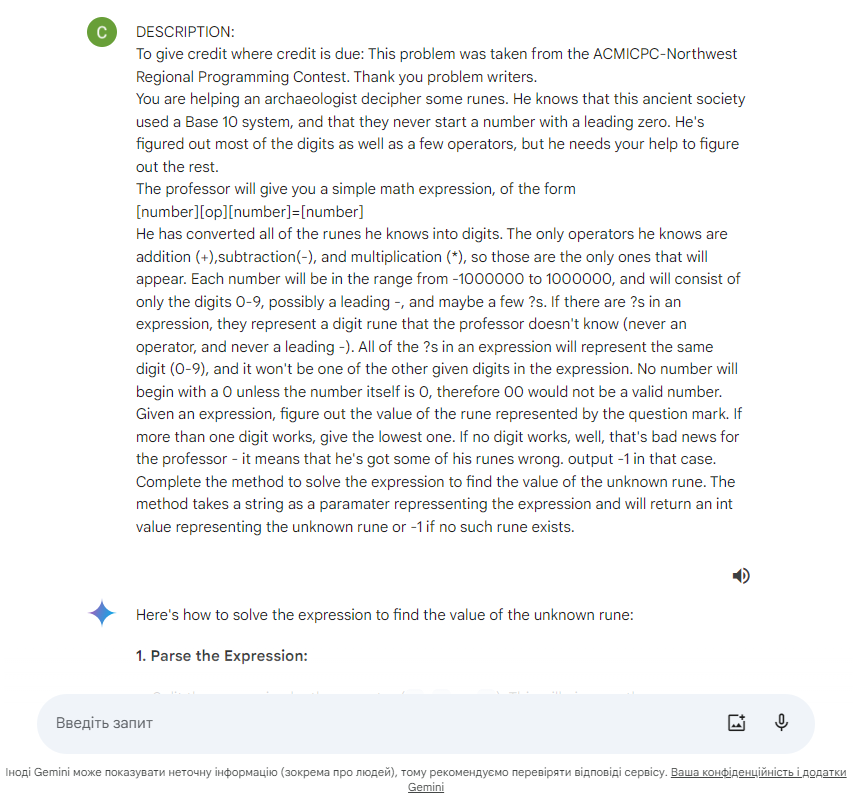

Його рішення, так само як і chat GPT видавали помилки, пов'язані зі split. Я вказала на ці помилки

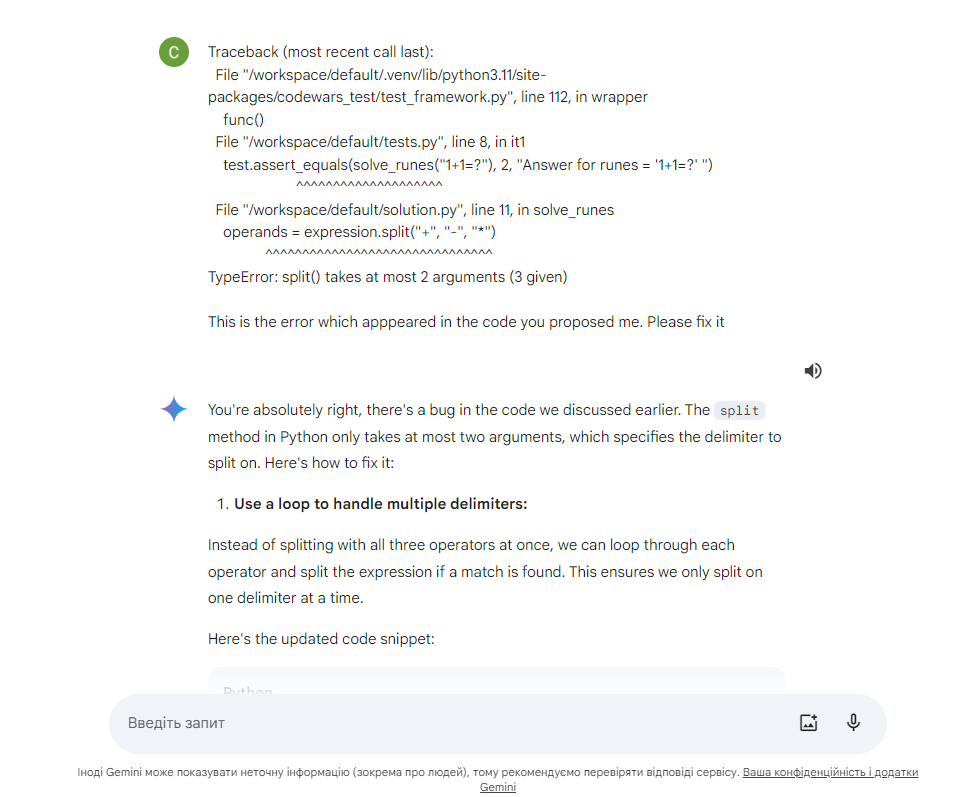

Тоді з'явилася інша помилка

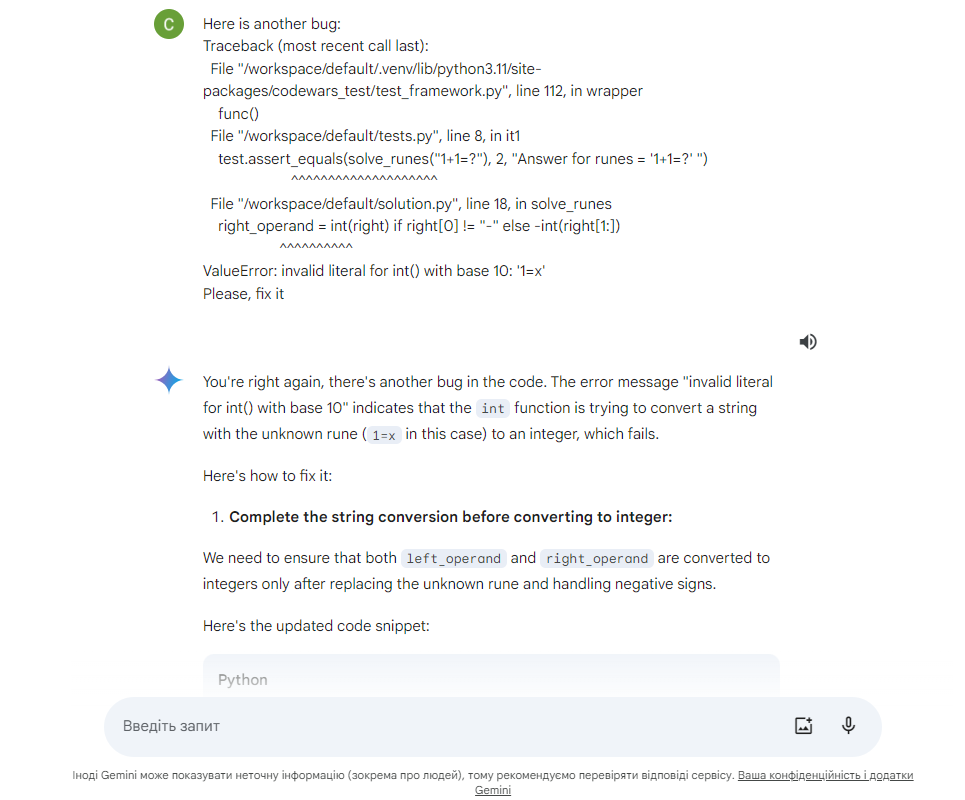

З кожним зауваженням до помилки він виправляв їх, але постійно з'являлися нові. Через деякий час помилки почали повторюватися.
Тому я так само, як з чатом GPT почала новий чат і дала повний опис завдання з прикладами роботи.

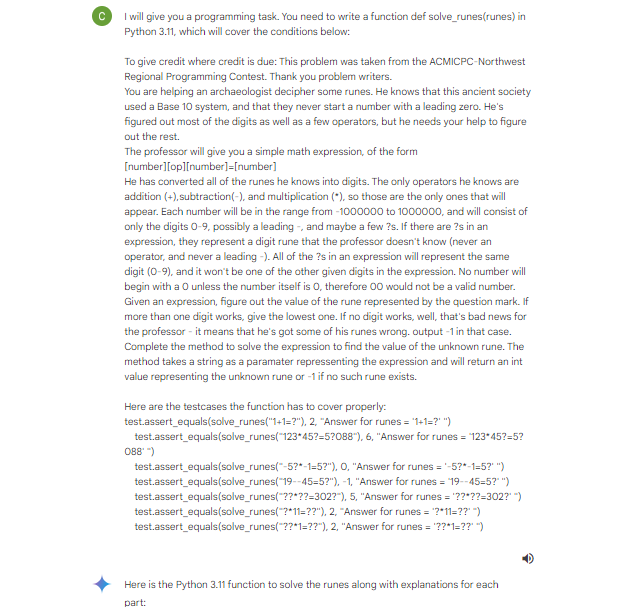

З'являлися ті самі помилки, але через кілька спроб він видав код, який проходив без помилок, але майже всі тести не працювали правильно.

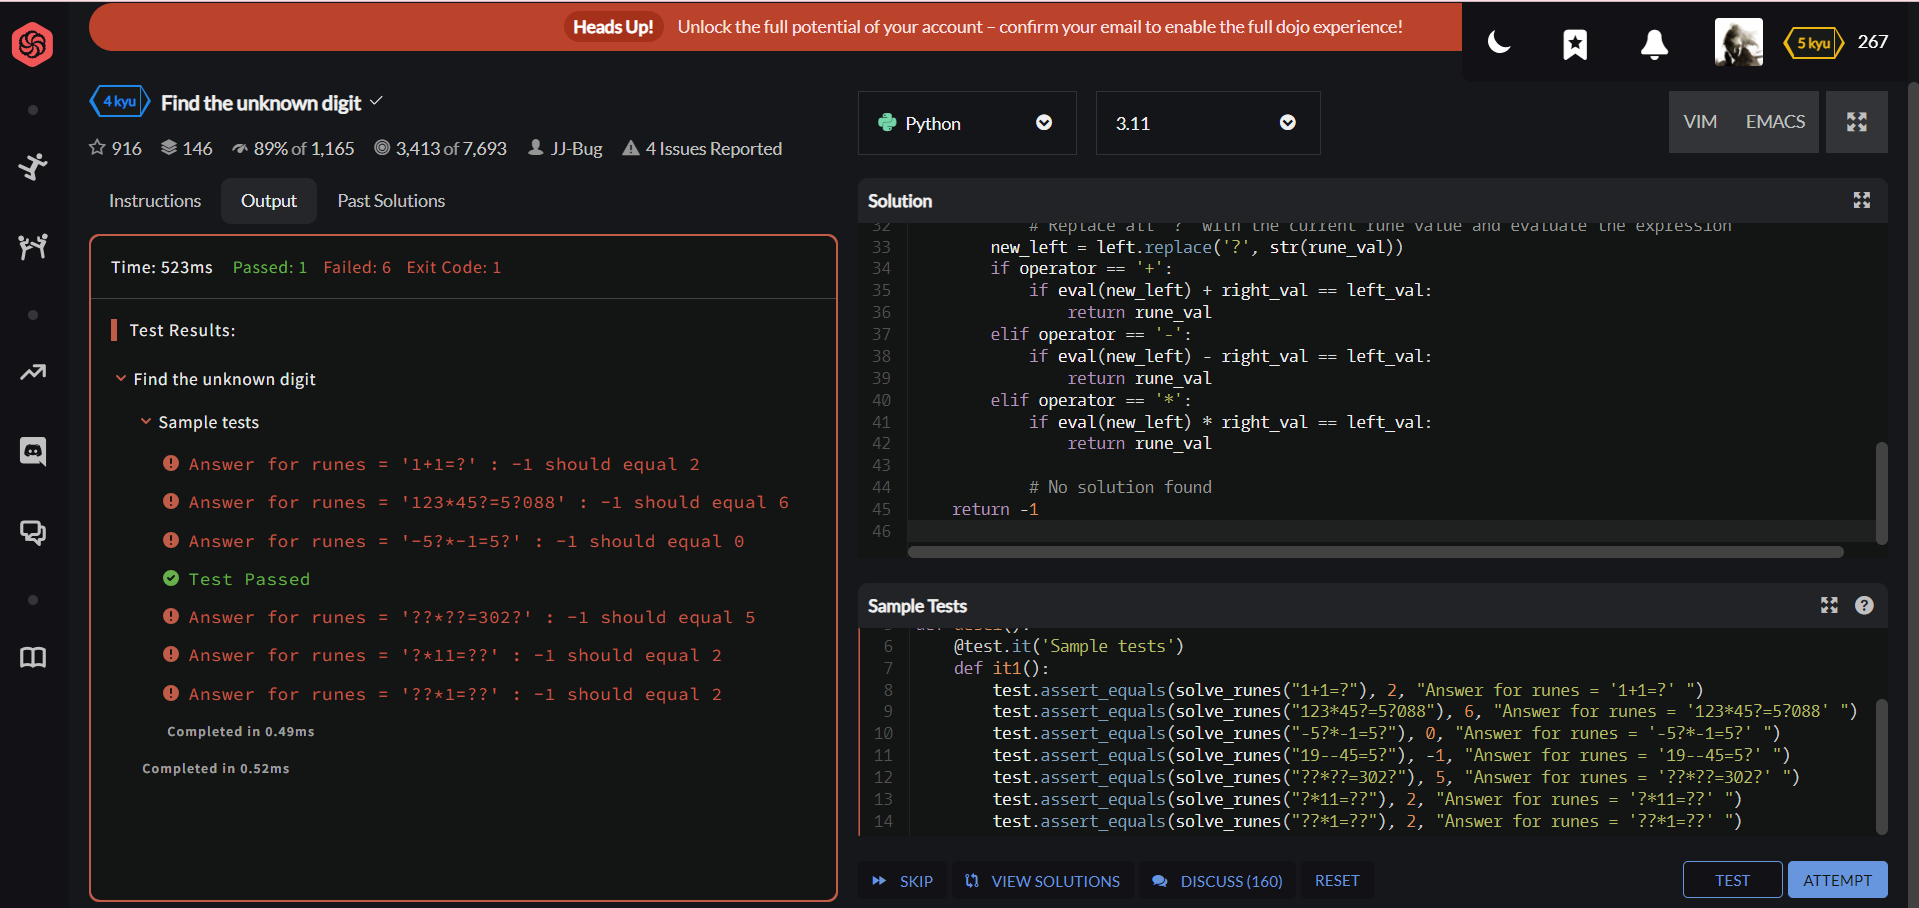

Далі після спроб виправити ці помилки почали знову з'являтися винятки, які повторювалися. Тому найкраще його рішення проходить лише один тест.

In [ ]:
def solve_runes(runes):
    """
    Solves a math expression with unknown runes (represented by '?') and returns the value of the rune.

    Args:
        runes: A string representing the math expression.

    Returns:
        The value of the unknown rune (0-9) or -1 if no solution exists.
    """

        # Split the expression into left operand, operator, and right operand
    parts = runes.split('=')
    if len(parts) != 2:
        return -1  # Invalid expression format

    left, operator, right = parts[0].strip(), parts[1].strip(), parts[1].strip()

        # Replace '?' with '-1' for evaluation with placeholders
    new_left = left.replace('?', '-1')
    new_right = right.replace('?', '-1')

        # Evaluate the expression with placeholders using eval (caution with untrusted input)
    try:
        left_val = eval(new_left)
        right_val = eval(new_right)
    except (NameError, SyntaxError):
        return -1  # Invalid expression format

        # Iterate through all possible values (0-9) for the unknown rune
    for rune_val in range(10):
            # Replace all '?' with the current rune value and evaluate the expression
        new_left = left.replace('?', str(rune_val))
        if operator == '+':
            if eval(new_left) + right_val == left_val:
                return rune_val
        elif operator == '-':
            if eval(new_left) - right_val == left_val:
                return rune_val
        elif operator == '*':
            if eval(new_left) * right_val == left_val:
                return rune_val

            # No solution found
    return -1


Наше допрацьоване рішення

In [ ]:
def solve_runes(expression):
    left, right = expression.split('=')
    number = -1
    for i in range(10):
        try:
            if eval(left.replace('?', str(i))) == int(right.replace('?', str(i))):
                # replaced = expression.replace('?', str(i))
                if str(i) not in expression and i!=0:
                    number = i
                if i == 0:
                    replaced = expression.replace('?', str(i))
                    for j, el in enumerate(replaced):
                        if j != 0 and el == '0' and replaced[j-1] != '0':
                            if j != len(replaced) - 1 and replaced[j-1] not in ['0', '-', '+', '=', '*']:
                                if str(i) not in expression:
                                    number = i
            if number != -1:
                return number
        except SyntaxError:
            continue
    return number


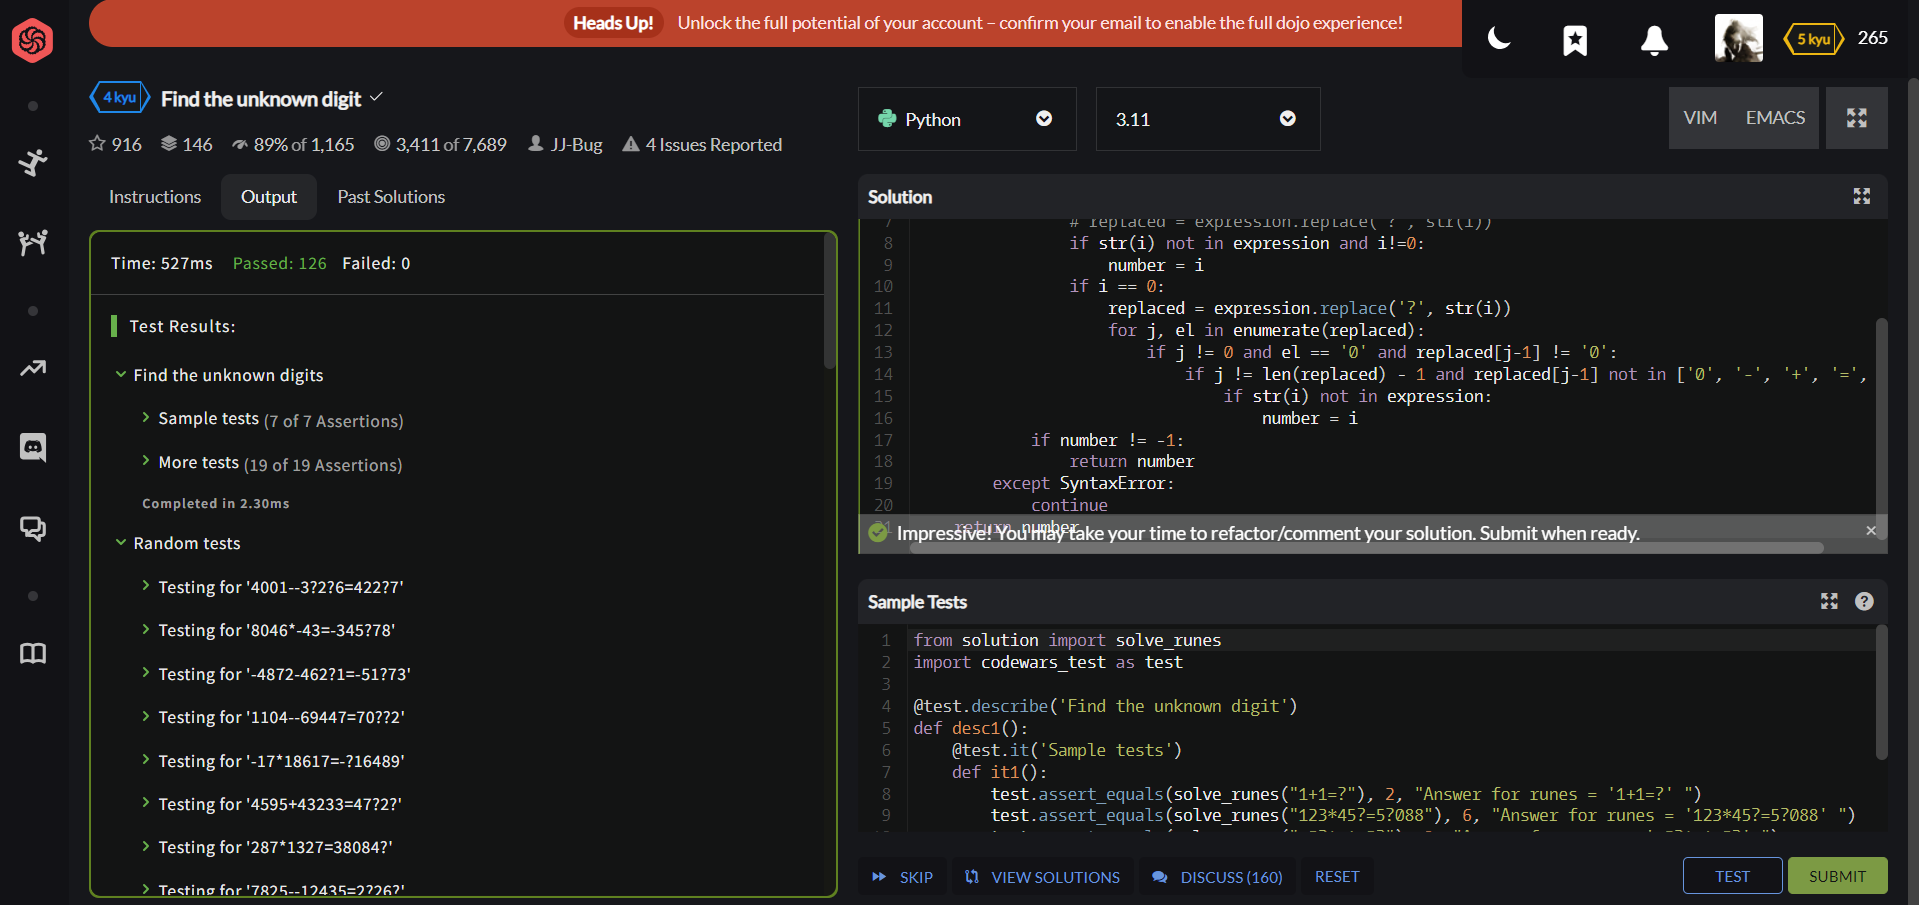